In [1]:
from gensim.models.keyedvectors import KeyedVectors
from pathlib import Path
import numpy as np
from tqdm import tqdm

In [2]:
def __init__(self, vector_size=100, window=5, min_count=1, workers=4):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.model = None
        self.labels = None

In [3]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
import numpy as np

# Загрузка стоп-слов (нужно выполнить один раз)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # для других языков измените 'english'



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alex4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def preprocess_text(text):
    """Токенизация и очистка текста."""
    tokens = simple_preprocess(text, deacc=True)  # удаляет пунктуацию и разбивает на слова
    return [word for word in tokens if word not in stop_words]



In [5]:
def train_word2vec(sentences, vector_size=100, window=5, min_count=1, workers=4):
    """Обучает модель Word2Vec на переданных предложениях."""
    model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=workers
    )
    return model



In [6]:
def text_to_vector(model, text):
    """Преобразует текст в вектор усреднением векторов слов."""
    words = preprocess_text(text)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)



In [7]:
test_data = pd.read_parquet("C:/Users/alex4/Desktop/code/data/test.parquet")


In [8]:
train_data = pd.read_parquet("C:/Users/alex4/Desktop/code/data/train.parquet")

In [9]:
# Загрузка данных
df = pd.read_parquet("C:/Users/alex4/Desktop/code/data/train.parquet")
texts = df["text"].tolist()  # замените "text_column" на название столбца с текстом

# Предобработка текстов
tokenized_texts = [preprocess_text(text) for text in texts]

# Обучение модели Word2Vec
model = train_word2vec(tokenized_texts, vector_size=100)



In [10]:
# Пример векторизации текста
sample_text = "Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing President Hugo Chavez from\office or give him a new ."
vector = text_to_vector(model, sample_text)
print("Вектор текста:", vector)

Вектор текста: [-0.5298573   0.3508854   0.46708238  0.42534518  0.9168919  -0.55355763
 -0.4135687   0.5147011   0.02415916  0.2693016  -0.04688933 -0.5519185
  0.5476962   0.6469962  -0.12060989  0.2707327   0.49325746 -0.53634864
 -0.27570513 -0.2516426   0.31737193  0.30288824  0.59090996 -0.54353434
  0.11531451  0.29448205 -0.2537666   0.4150355  -0.19597852 -0.00803636
 -0.17500436 -0.30785948  0.18789253 -0.21675703  0.20629948  0.3874705
  0.590161    0.07188608 -0.25321147  0.622566    0.15275222  0.27741045
  0.3926469   0.07744365  0.8258456   0.0316661  -0.27868342  0.22961156
  0.29079795  0.3185833   0.12612373  0.15210013 -0.350635   -0.41477785
 -0.31273672  0.10444818  0.02058253  0.32739276  0.05134287  0.24969682
  0.5701243   0.4037765  -0.7988372  -0.075078   -0.02233925  0.12134157
  0.52725714 -0.1705228  -0.3531145   0.6217713  -0.25829652 -0.29322565
  0.09080791  0.16182597 -0.08286405  0.7052227   0.76419395  0.7608181
 -0.2929224  -0.7349976  -0.4972495   0

In [11]:
sentences = [
    ["cat", "sits", "on", "mat"],
    ["dog", "runs", "in", "park"],
    ["tiger", "hunts", "in", "jungle"],
    ["animal", "lives", "in", "forest"],
    ["sentence", "has", "words"],
    ["creation", "is", "art"],
    ["feline", "is", "predator"]
]

In [12]:
from sklearn.metrics.pairwise import cosine_similarity


In [13]:
def compare_similarity(model, target_word, similar_words, domain_words, unrelated_words):
    target_vec = model.wv[target_word].reshape(1, -1)
    
    # Сравнение с похожими словами
    print(f"\nСравнение для слова: '{target_word}'")
    print("--- Похожие слова ---")
    for word in similar_words:
        vec = model.wv[word].reshape(1, -1)
        sim = cosine_similarity(target_vec, vec)[0][0]
        print(f"{word}: {sim:.3f}")
    
    # Сравнение с тематическими словами
    print("\n--- Тематические слова ---")
    for word in domain_words:
        vec = model.wv[word].reshape(1, -1)
        sim = cosine_similarity(target_vec, vec)[0][0]
        print(f"{word}: {sim:.3f}")
    
    # Сравнение с несвязанными словами
    print("\n--- Несвязанные слова ---")
    for word in unrelated_words:
        vec = model.wv[word].reshape(1, -1)
        sim = cosine_similarity(target_vec, vec)[0][0]
        print(f"{word}: {sim:.3f}")

# Пример вызова
target_word = "cat"
similar_words = ["tiger", "feline"]
domain_words = ["animal", "dog"]
unrelated_words = ["sentence", "creation"]



In [14]:
compare_similarity(model, target_word, similar_words, domain_words, unrelated_words)


Сравнение для слова: 'cat'
--- Похожие слова ---
tiger: 0.281
feline: 0.324

--- Тематические слова ---
animal: 0.635
dog: 0.673

--- Несвязанные слова ---
sentence: 0.079
creation: 0.102


In [15]:
hyperparams = [
    {"vector_size": 50, "window": 3},
    {"vector_size": 100, "window": 5},
    {"vector_size": 200, "window": 7}
]

results = []
for params in hyperparams:
    model = Word2Vec(sentences, **params, min_count=1)
    vec1 = model.wv["cat"].reshape(1, -1)
    vec2 = model.wv["tiger"].reshape(1, -1)
    sim = cosine_similarity(vec1, vec2)[0][0]
    results.append((params, sim))

# Результаты
for params, sim in results:
    print(f"Параметры: {params}, Сходство (cat-tiger): {sim:.3f}")

Параметры: {'vector_size': 50, 'window': 3}, Сходство (cat-tiger): 0.011
Параметры: {'vector_size': 100, 'window': 5}, Сходство (cat-tiger): -0.026
Параметры: {'vector_size': 200, 'window': 7}, Сходство (cat-tiger): -0.100


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

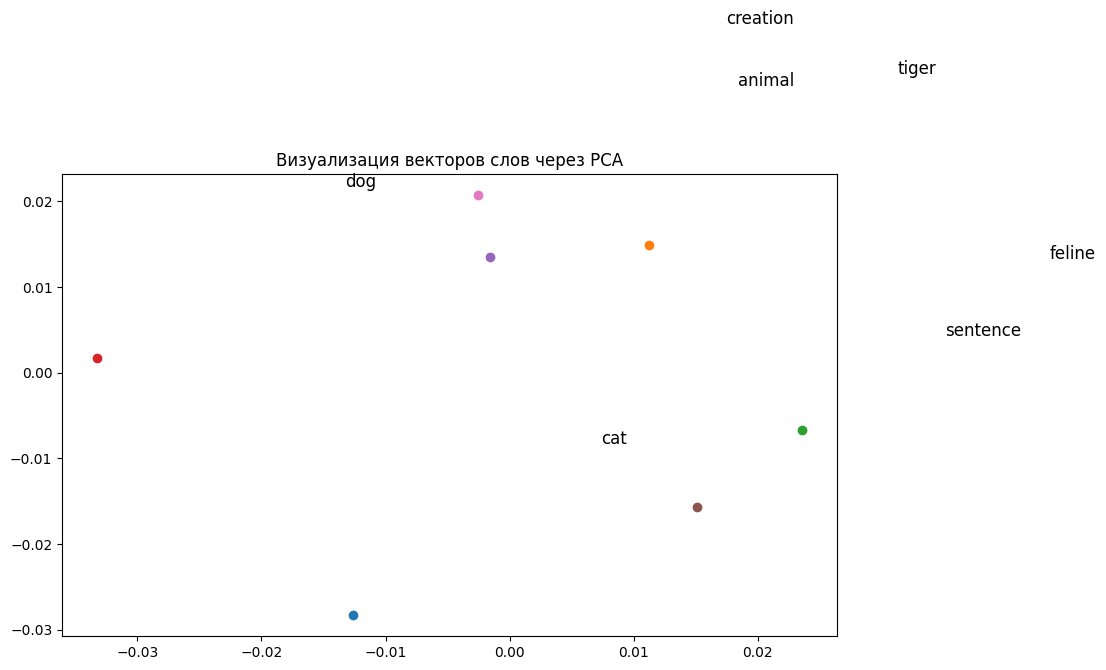

In [17]:
def plot_word_vectors(model, words):
    # Получение векторов
    vectors = np.array([model.wv[word] for word in words])
    
    # Сокращение до 2D
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    
    # Визуализация
    plt.figure(figsize=(10, 6))
    for i, word in enumerate(words):
        plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], marker='o')
        plt.text(vectors_2d[i, 0] + 0.02, vectors_2d[i, 1] + 0.02, word, fontsize=12)
    
    plt.title("Визуализация векторов слов через PCA")
    plt.show()

# Пример слов для визуализации
words = ["cat", "tiger", "feline", "dog", "animal", "sentence", "creation"]
plot_word_vectors(model, words)

In [18]:
import numpy as np

def manual_cosine(a, b):
    """Вычисляет косинусное расстояние между векторами a и b."""
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# Проверка на примере
vec1 = model.wv["cat"]
vec2 = model.wv["tiger"]
print("Ручное вычисление:", manual_cosine(vec1, vec2))
print("Библиотечное вычисление:", cosine_similarity([vec1], [vec2])[0][0])

Ручное вычисление: -0.10005622
Библиотечное вычисление: -0.100056216


In [19]:
import re
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
import re
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

# Ваши функции с небольшими исправлениями
def preprocess_text(text):
    """Добавьте вашу реализацию предобработки текста"""
    # Пример простой предобработки:
    text = text.lower()
    tokens = text.split()
    return tokens

In [21]:
def train_word2vec(sentences, vector_size=100, window=5, min_count=1, workers=4):
    """Обучает модель Word2Vec на переданных предложениях."""
    model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=workers
    )
    return model

In [22]:

def segment_and_tokenize_custom(text: str):
    # Список сокращений, которые не должны разделяться
    abbreviations = ['Dr.', 'Mr.', 'Ms.', 'Mrs.', 'Prof.', 'г.', 'ул.', 'д.', 'кв.', 'st.']

    # Экранируем сокращения
    for abbr in abbreviations:
        text = text.replace(abbr, abbr.replace('.', '<DOT>'))

    # Разделение на предложения по [.!?] + пробел + заглавная буква
    sentence_split_pattern = re.compile(r'([.!?])\s+(?=[А-ЯA-Z])')
    text = sentence_split_pattern.sub(r'\1<<<SENT>>>', text)

    # Возвращаем точки обратно в сокращениях
    text = text.replace('<DOT>', '.')

    # Разделяем на предложения
    sentences = text.split('<<<SENT>>>')

    # Общий токенайзер
    token_pattern = re.compile(r"""
        \b(?:\+7|8)[-\s(]?\d{3}[-\s)]?\d{3}[-]?\d{2}[-]?\d{2}\b |         # телефоны
        \b[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+\b |              # email
        г\.\s?[А-Яа-я\-]+,?\s+ул\.?\s?[А-Яа-я\- ]+,?\s+д\.?\s?\d+,?\s+кв\.?\s?\d+ |  # адреса
        [:;=8][-~]?[)D\(] |                                               # эмотиконы
        (?:[A-ZА-Я][a-zа-я]{0,3}\.)\s?[A-ZА-Я][a-zа-я]+ |                 # сокращения + фамилия
        \b\w+\s*=\s*[\w\s\*\+\-/\(\)\^=]+ |                               # формулы
        [А-Яа-яA-Za-z0-9]+(?:-[А-Яа-яA-Za-z0-9]+)* |                     # слова
        [.,!?;:] |                                                       # пунктуация
        [^\s]                                                            # прочее
    """, re.VERBOSE)

    tokenized_sentences = []
    for sentence in sentences:
        tokens = token_pattern.findall(sentence.strip())
        if tokens:
            tokenized_sentences.append(tokens)

    return tokenized_sentences


In [23]:
texts

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.",
 'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.',
 'Oil prices soar to all-time record, posing new menace to US economy (A

In [24]:
def get_sentence_vector(tokens, model, word2tfidf=None):
    """Преобразует предложение в вектор с учетом TF-IDF весов"""
    vectors = []
    weights = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
            if word2tfidf:
                weights.append(word2tfidf.get(token, 1.0))
            else:
                weights.append(1.0)
    
    if not vectors:
        return np.zeros(model.vector_size)
    
    vectors = np.array(vectors)
    weights = np.array(weights)
    
    if word2tfidf:
        weights = weights / weights.sum()
        return np.dot(weights, vectors)
    else:
        return np.mean(vectors, axis=0)

In [25]:

def calculate_tfidf_weights(tokenized_sentences):
    """Вычисляет TF-IDF веса для токенов"""
    sentences_as_str = [' '.join(sentence) for sentence in tokenized_sentences]
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_as_str)
    
    word2tfidf = defaultdict(float)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    for i, sentence in enumerate(sentences_as_str):
        for j, word in enumerate(sentence.split()):
            if word in feature_names:
                idx = np.where(feature_names == word)[0][0]
                word2tfidf[word] += tfidf_matrix[i, idx]
    return word2tfidf

In [26]:
def vectorize_text(text, model, use_tfidf=False):
    """Основная функция векторизации текста"""
    # 1. Сегментация и токенизация
    tokenized_sentences = segment_and_tokenize_custom(text)
    
    # 2. Расчет TF-IDF весов (если нужно)
    word2tfidf = None
    if use_tfidf:
        word2tfidf = calculate_tfidf_weights(tokenized_sentences)
    
    # 3. Векторизация предложений
    sentence_vectors = []
    for sentence in tokenized_sentences:
        vec = get_sentence_vector(sentence, model, word2tfidf)
        sentence_vectors.append(vec)
    # 4. Агрегация в вектор документа
    if not sentence_vectors:
        return np.zeros(model.vector_size)
    
    return np.mean(sentence_vectors, axis=0)


In [27]:
df = pd.read_parquet("C:/Users/alex4/Desktop/code/data/train.parquet")
texts = df["text"].tolist()
    
    # 2. Предобработка текстов
tokenized_texts = [preprocess_text(text) for text in texts]
    
    # 3. Обучение модели Word2Vec
model = train_word2vec(tokenized_texts, vector_size=100)
model.save("word2vec.model")  # Сохраняет всю модель (лучший способ)    
    # 4. Пример векторизации
test_text = " ".join(texts[:3])  # Берем первые 3 текста для примера
    
    # Векторизация без TF-IDF
simple_vector = vectorize_text(test_text, model)
print("Simple vector shape:", simple_vector.shape)
    
    # Векторизация с TF-IDF
tfidf_vector = vectorize_text(test_text, model, use_tfidf=True)
print("TF-IDF vector shape:", tfidf_vector.shape)

Simple vector shape: (100,)
TF-IDF vector shape: (100,)


In [28]:
print( simple_vector)


[ 0.02402514  0.17247061  0.19079438  0.4132855  -0.4347253  -0.7077722
  0.3659562   0.21374196 -0.3540527   0.11770408  0.10603487 -0.3513757
  0.14155824  0.73678637  0.42997426 -0.14387648 -0.04510939 -0.47479007
 -0.3330378  -0.1540523  -0.30350566  0.42342442  0.40039206 -0.40940717
  0.4121503  -0.18698217  0.32951725 -0.3019939  -0.13902202 -0.31353366
  0.08011121 -0.660066    0.2545721  -0.3648878   0.0771707   0.620047
 -0.37859446 -0.32823694 -0.48231655 -0.4868195  -0.338758   -0.14534426
  0.17443854 -0.1318138   0.2899235   0.2616708  -0.39568514  0.36733508
 -0.03248155  0.347428   -0.06122511 -0.28473207 -0.40305012 -0.33502015
 -0.18180847  0.19897851 -0.07573102  0.10381498 -0.3748213  -0.31813645
  0.2594757   0.08603351 -0.25648788 -0.10076078 -0.5672678   0.37842345
 -0.22245917  0.4244025  -1.0128169  -0.052339   -0.3645666  -0.11313301
  0.92456335  0.3536719   0.4022916   0.18322179  0.5910636  -0.05597732
 -0.2973795   0.4506632  -0.2902074   0.04670924 -0.286

In [29]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [30]:
# 1. Загрузка аннотаций и подготовка путей
def load_annotations(base_path="C:/Users/alex4/Desktop/code/lab1/output_annotations"):
    doc_ids = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.startswith("annotations_") and file.endswith(".tsv"):
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path, sep='\t', header=None)
                    # Берем первый столбец с doc_id
                    doc_ids.extend(df[0].tolist())
                except Exception as e:
                    print(f"Ошибка при чтении {file_path}: {e}")
    return doc_ids

In [31]:
# 2. Векторизация документов
def vectorize_documents(doc_ids, model, text_data_path):
    vectors = {}
    for doc_id in tqdm(doc_ids, desc="Vectorizing documents"):
        # Формируем путь к файлу (предполагаем, что тексты хранятся как <doc_id>.txt)
        file_path = os.path.join(text_data_path, f"{doc_id}.txt")
        
        if os.path.exists(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()
            
            # Векторизация (используем вашу функцию vectorize_text)
            vector = vectorize_text(text, model)
            vectors[doc_id] = vector
        else:
            print(f"Warning: File not found - {file_path}")
            vectors[doc_id] = np.zeros(model.vector_size)
    
    return vectors


In [32]:
def save_to_tsv(vectors, output_file="vectors.tsv"):
    with open(output_file, 'w', encoding='utf-8') as f:
        for doc_id, vector in vectors.items():
            # Преобразуем вектор в строку с табуляциями
            vector_str = '\t'.join([str(x) for x in vector])
            # Записываем строку: doc_id\tcomponent1\tcomponent2...
            f.write(f"{doc_id}\t{vector_str}\n")

In [33]:
if __name__ == "__main__":
    # Загрузка модели (предполагаем, что модель уже обучена)
 # Замените на ваш путь
    
    # 1. Загрузка аннотаций
    annotations = load_annotations()
    doc_ids = [item[0] for item in annotations]
    
    # 2. Векторизация документов
    vectors = vectorize_documents(doc_ids, model, text_data_path="text_data")  # Укажите путь к текстам
    
    # 3. Сохранение результатов
    save_to_tsv(vectors)
    print("Векторизация завершена. Результаты сохранены в vectors.tsv")

Ошибка при чтении C:/Users/alex4/Desktop/code/lab1/output_annotations\1\annotations_1.tsv: Error tokenizing data. C error: EOF inside string starting at row 8825
Ошибка при чтении C:/Users/alex4/Desktop/code/lab1/output_annotations\2\annotations_2.tsv: Error tokenizing data. C error: EOF inside string starting at row 1119381
Ошибка при чтении C:/Users/alex4/Desktop/code/lab1/output_annotations\3\annotations_3.tsv: Error tokenizing data. C error: EOF inside string starting at row 634215


TypeError: 'float' object is not subscriptable

In [34]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from gensim.models import Word2Vec

In [35]:
# 1. Загрузка аннотаций и подготовка данных
def load_annotation_data(base_path="C:/Users/alex4/Desktop/code/lab1/output_annotations1"):
    documents = {}  # Будет хранить {doc_id: содержимое_документа}
    
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.startswith("annotations_") and file.endswith(".tsv"):
                try:
                    # Извлекаем doc_id из имени файла
                    doc_id = file.split('_')[1].split('.')[0]
                    file_path = os.path.join(root, file)
                    
                    # Читаем TSV файл
                    df = pd.read_csv(file_path, sep='\t', header=None)
                    
                    # Объединяем все строки в один документ (адаптируйте при необходимости)
                    document_content = " ".join(str(x) for x in df.values.flatten())
                    documents[doc_id] = document_content
                    
                except Exception as e:
                    print(f"Ошибка при обработке файла {file}: {e}")
    return documents

In [36]:
# 2. Векторизация документов
def vectorize_documents(documents, model):
    vectors = {}
    
    for doc_id, content in tqdm(documents.items(), desc="Vectorizing documents"):
        try:
            # Векторизация содержимого документа
            vector = vectorize_text(content, model)
            vectors[doc_id] = vector
        except Exception as e:
            print(f"Ошибка при векторизации документа {doc_id}: {e}")
            vectors[doc_id] = np.zeros(model.vector_size)
    
    return vectors


In [37]:
def save_to_tsv(vectors, output_file="vectors.tsv"):
    with open(output_file, 'w', encoding='utf-8') as f:
        for doc_id, vector in vectors.items():
            vector_str = '\t'.join([str(x) for x in vector])
            f.write(f"{doc_id}\t{vector_str}\n")


In [38]:
if __name__ == "__main__":
    # Загрузка модели (предполагаем, что модель уже обучена)
    # model = ... (ваша предварительно загруженная модель)
    
    # 1. Загрузка данных из аннотаций
    documents = load_annotation_data()
    print(f"Loaded {len(documents)} documents for vectorization")
    
    # 2. Векторизация документов
    vectors = vectorize_documents(documents, model)
    
    # 3. Сохранение результатов
    save_to_tsv(vectors)
    print("Векторизация завершена. Результаты сохранены в vectors.tsv")

Ошибка при обработке файла annotations_3.tsv: Error tokenizing data. C error: EOF inside string starting at row 23823
Loaded 3 documents for vectorization


Vectorizing documents: 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

Векторизация завершена. Результаты сохранены в vectors.tsv


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def load_annotation_data(base_path="C:/Users/alex4/Desktop/code/lab1/output_annotations1"):
    documents = {}
    
    # Явно перебираем файлы от 0 до 3
    for i in range(4):
        file_name = f"annotations_{i}.tsv"
        file_path = os.path.join(base_path, str(i), file_name)
        
        if not os.path.exists(file_path):
            print(f"Файл не найден: {file_path}")
            continue
            
        try:
            # Чтение с разными методами для обработки ошибок
            try:
                # Попытка 1: стандартное чтение
                df = pd.read_csv(file_path, sep='\t', header=None, quoting=3)
            except:
                # Попытка 2: чтение с пропуском ошибок
                df = pd.read_csv(file_path, sep='\t', header=None, error_bad_lines=False)
                
            # Собираем содержимое файла
            content = ""
            if not df.empty:
                for row in df.values:
                    content += " ".join(str(x) for x in row if pd.notna(x)) + " "
            
            documents[str(i)] = content.strip()
            print(f"Успешно загружен: {file_name}")
            
        except Exception as e:
            print(f"Ошибка в файле {file_name}: {str(e)}")
            # Создаем пустой документ, чтобы сохранить все 4 файла
            documents[str(i)] = ""
    
    return documents

def vectorize_documents(documents, model):
    vectors = {}
    for doc_id, content in tqdm(documents.items(), desc="Vectorizing"):
        try:
            vector = vectorize_text(content, model)
            vectors[doc_id] = vector
        except:
            vectors[doc_id] = np.zeros(model.vector_size)
    return vectors

def save_to_tsv(vectors, output_file="vectors.tsv"):
    with open(output_file, 'w', encoding='utf-8') as f:
        for doc_id, vector in sorted(vectors.items()):
            vector_str = '\t'.join([f"{x:.6f}" for x in vector])
            f.write(f"{doc_id}\t{vector_str}\n")

if __name__ == "__main__":
    # model = ... (инициализация вашей модели)
    
    print("Принудительная загрузка 4 файлов (0-3)...")
    documents = load_annotation_data()
    
    print("\nСтатус загрузки:")
    for i in range(4):
        status = "Загружен" if str(i) in documents else "Ошибка"
        print(f"Файл {i}: {status}")
    
    print("\nВекторизация...")
    vectors = vectorize_documents(documents, model)
    
    print("Сохранение результатов...")
    save_to_tsv(vectors)
    print(f"Готово! Векторизовано {len(vectors)} документов. Результаты в vectors.tsv")

Принудительная загрузка 4 файлов (0-3)...
Успешно загружен: annotations_0.tsv
Успешно загружен: annotations_1.tsv
Успешно загружен: annotations_2.tsv
Успешно загружен: annotations_3.tsv

Статус загрузки:
Файл 0: Загружен
Файл 1: Загружен
Файл 2: Загружен
Файл 3: Загружен

Векторизация...


Vectorizing: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

Сохранение результатов...
Готово! Векторизовано 4 документов. Результаты в vectors.tsv
